# This tutorial shows how to compress an atlas.

In [1]:
import scanpy as sc 
import pandas as pd
import numpy as np
import umap 

from SURE.assembly import SingleOmicsAtlas

import torch 
torch.set_float32_matmul_precision("high")


/home/oem/anaconda3/envs/pyro/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-11-08 10:35:36.154552: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 10:35:36.161685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 10:35:36.173975: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 10:35:36.177648: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been 

## Download and load dataset

The dataset used is available at the CellxGene site under [this link](https://cellxgene.cziscience.com/collections/8f17ac63-aaba-44b5-9b78-60f121da4c2f).

In [2]:
adata = sc.read_h5ad('/media/oem/UB20_DATA/Workspace/Tutorial/tutorial_3/dec70cce-db5a-44f1-9dc8-daa1280ce75d.h5ad')
adata = adata.raw.to_adata()
adata.layers['counts'] = adata.X.copy()
adata.X.max()

66065.0

## Compress this dataset into 500 metacells

In [3]:
atlas = SingleOmicsAtlas('compressed')
atlas.fit([adata], batch_key='donor_id', pheno_keys=['cell_type'])

Create A Distribution-Preserved Single-Cell Omics Atlas
1 adata datasets are given
Adata 1 / 1: Preprocessing
Adata 1 / 1: Find 5000 HVGs
5000 common HVGs are found
Adata 1 / 1: Compute distribution-preserved sketching with 500 metacells
CUDA_VISIBLE_DEVICES=0 SURE --data-file "/tmp/tmpjhzklxdn/temp_counts_0.txt.gz" --undesired-factor-file
    "/tmp/tmpjhzklxdn/temp_uwv_0.txt.gz" --seed 0 --cuda --jit -lr 0.0001 -n 200 -bs 512 -cs 500 -likeli negbinomial
    -dirichlet -zi exact --save-model "/tmp/tmpjhzklxdn/temp_0.pth"


100%|██████████| 111/111 [00:00<00:00, 251.64batch/s]


Model saved to /tmp/tmpjhzklxdn/temp_0.pth
Model loaded from /tmp/tmpjhzklxdn/temp_0.pth
Adata 1 / 1: Summarize data in counts


100%|██████████| 111/111 [00:00<00:00, 254.70batch/s]


Adata 1 / 1: Summarize data in cell_type


100%|██████████| 111/111 [00:00<00:00, 295.28batch/s]


Compute the reference position of the atlas


100%|██████████| 49/49 [00:00<00:00, 291.37batch/s]


A distribution-preserved atlas has been built from 1 adata datasets.


## Display the compressed atlas

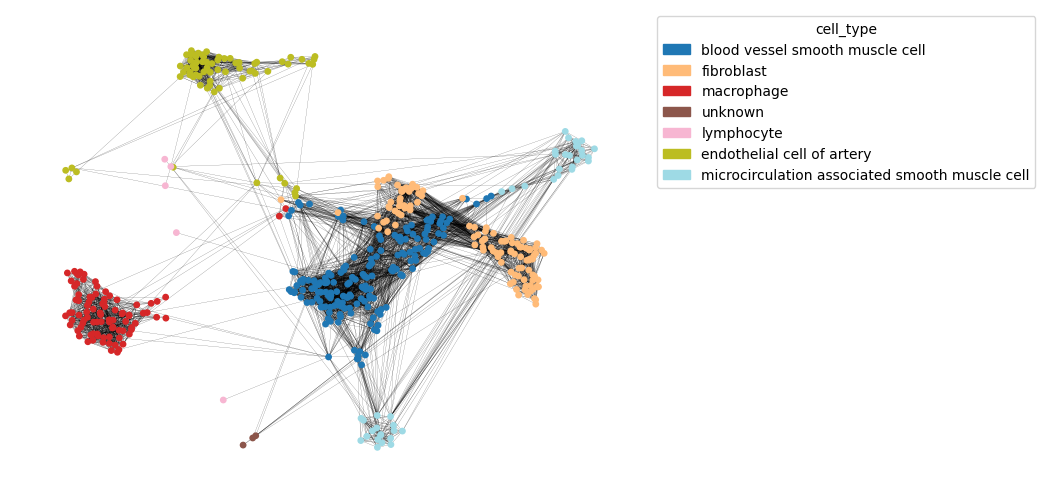

In [5]:
atlas.display_network(pheno_key='cell_type', edge_width=0.1)